In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data_extraction/csv_files/vehicle_registration_by_fuel.csv')

In [3]:
# print the shape
print('The shape of the dataset : ', df.shape)

The shape of the dataset :  (592200, 4)


In [4]:
# preview dataset
df.head()

,Region,FuelType,YearMonth,NumberOfRegistration
0,Sweden,petrol,2006M01,13617
1,Sweden,petrol,2006M02,14687
2,Sweden,petrol,2006M03,19609
3,Sweden,petrol,2006M04,21439
4,Sweden,petrol,2006M05,24117


In [5]:
# summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592200 entries, 0 to 592199
Data columns (total 4 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Region                592200 non-null  object
 1   FuelType              592200 non-null  object
 2   YearMonth             592200 non-null  object
 3   NumberOfRegistration  592200 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 18.1+ MB


In [6]:
df['FuelType'].unique()

array(['petrol', 'diesel', 'electricity', 'electric hybrid',
       'plug-in hybrid', 'ethanol/ethanol flexifuel', 'gas/gas flex',
       'other fuels'], dtype=object)

In [15]:
df[['Year', 'Month']] = df['YearMonth'].str.split('M', expand=True)
# Convert 'year' and 'month' columns to integer type
df['Year'] = df['Year'].astype(int)
df['Month'] = df['Month'].astype(int)

In [16]:
df.head()

,Region,FuelType,YearMonth,NumberOfRegistration,Year,Month
0,Sweden,petrol,2006M01,13617,2006,1
1,Sweden,petrol,2006M02,14687,2006,2
2,Sweden,petrol,2006M03,19609,2006,3
3,Sweden,petrol,2006M04,21439,2006,4
4,Sweden,petrol,2006M05,24117,2006,5


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592200 entries, 0 to 592199
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Region                592200 non-null  object
 1   FuelType              592200 non-null  object
 2   YearMonth             592200 non-null  object
 3   NumberOfRegistration  592200 non-null  int64 
 4   Year                  592200 non-null  int64 
 5   Month                 592200 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 27.1+ MB


In [19]:
df1 = df[(df['FuelType']=='petrol') & (df['Region'] =='Sweden') & (df['Year'] >= 2006) & (df['Month'] == 12)]
df2 = df[(df['FuelType']=='diesel') & (df['Region'] =='Sweden') & (df['Year'] >= 2006) & (df['Month'] == 12)]
df3 = df[(df['FuelType']=='electricity') & (df['Region'] =='Sweden') & (df['Year'] >= 2006) & (df['Month'] == 12)]

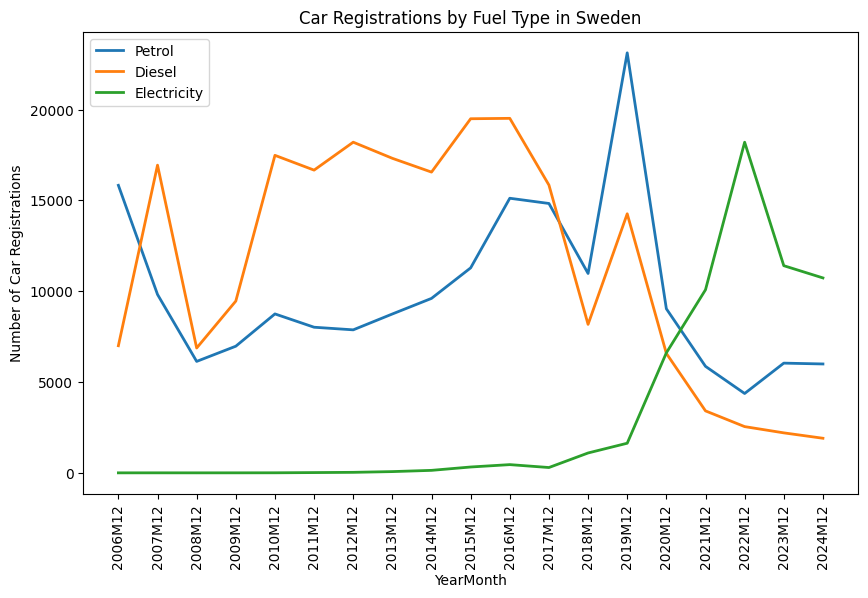

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df1['YearMonth'], df1['NumberOfRegistration'], linewidth=2.0, label='Petrol')
ax.plot(df2['YearMonth'], df2['NumberOfRegistration'], linewidth=2.0, label='Diesel')
ax.plot(df3['YearMonth'], df3['NumberOfRegistration'], linewidth=2.0, label='Electricity')

# To rotate the x-axis labels to a vertical orientation
ax.tick_params(axis='x', rotation=90)

# Add labels and a title for clarity
ax.set_xlabel('YearMonth')
ax.set_ylabel('Number of Car Registrations')
ax.set_title('Car Registrations by Fuel Type in Sweden')

# Add a legend with a specific location
ax.legend(loc='upper left')